In [ ]:
%pip install dataframe-image

In [ ]:
import pandas as pd
import dataframe_image as dfi # to help same tables as images so they can be used in the report

#Data Analysis

In [ ]:
#read in the file
df = pd.read_csv('cc2.csv')
df.head()

#renaming the weight per row to yeild, makes typing easier
df.rename(columns={'Weight per row (lbs)': 'yield'}, inplace=True)
#df.describe()

In [ ]:
#calc max, min, mean, median
max = df['yield'].max()
min = df['yield'].min()
mean = df['yield'].mean()
median = df['yield'].median()

print("max: ",max)
print("min: ",min)
print("mean: ",mean)
print("median: ",median)

max:  15.65
min:  0.0
mean:  6.619561142857143
median:  6.512


mean is close to median so we know theres not psotive skew i.e there no large outlier skewing the mean

data doesn't seem to be heavily skewed

In [ ]:
# count entries above median and mean
entries_above_median = (df['yield'] > median).sum()
entries_above_mean = (df['yield'] > mean).sum()

print("Entries Above Mean: ", entries_above_mean)
print("Entries Above Median: ",entries_above_median)

print(len(df)/2)

Entries Above Mean:  425
Entries Above Median:  437
437.5


In [ ]:
# checking for unexpected yeild values

# yields that are zero
zero_yields = df[df['yield'] == 0 ]
print('Number of yields: ', len(zero_yields))



# checking if there is any  yield is missing, if so, we drop those rows, if not we just fill the values that are missing
(df['yield'].isna()).any(axis=0)

# getting descrptive statistic information
print("\nDescriptive Stats on Yield")
print(df['yield'].describe(), end='\n\n')


# showing them so we can manueally inspect the data
zero_yields.head()

Number of yields:  3

Descriptive Stats on Yield
count    875.000000
mean       6.619561
std        2.370967
min        0.000000
25%        5.116000
50%        6.512000
75%        8.170000
max       15.650000
Name: yield, dtype: float64



,row,col,rep,line,grid,irrigation,Row,yield,cc_0412,cc_0415,...,cc_0708,cc_0713,cc_0716,cc_0719,cc_0721,cc_0725,cc_0728,cc_0802,cc_0808,cc_0812
558,2,30,432,2,1,Yes,60,0.0,0.036960,0.078780,...,41.235156,43.015951,45.482457,55.570586,53.425363,52.890522,45.783002,37.386885,18.489986,22.085515
747,5,32,242,1,1,Yes,63,0.0,0.040784,0.030438,...,19.716315,24.619384,22.799835,37.131014,36.316600,24.023953,22.768234,22.527240,25.688084,27.197755
809,6,32,211,1,1,Yes,63,0.0,0.010196,0.007162,...,15.960181,15.825785,16.783669,19.629574,24.918213,22.190286,22.626897,23.876700,25.114812,22.452812


In [ ]:
# counting the total number of missing (NaN) values
num_missing_vals = df.isna().sum().sum()

print("Total number of missing values: ", num_missing_vals)

# countinng how many row contain at least one NaN
num_rows_missing_vals = df.isna().any(axis=1).sum()

print("Rows with at least one NaN: ", num_rows_missing_vals)

Total number of missing values:  17
Rows with at least one NaN:  10


#Data Visualization

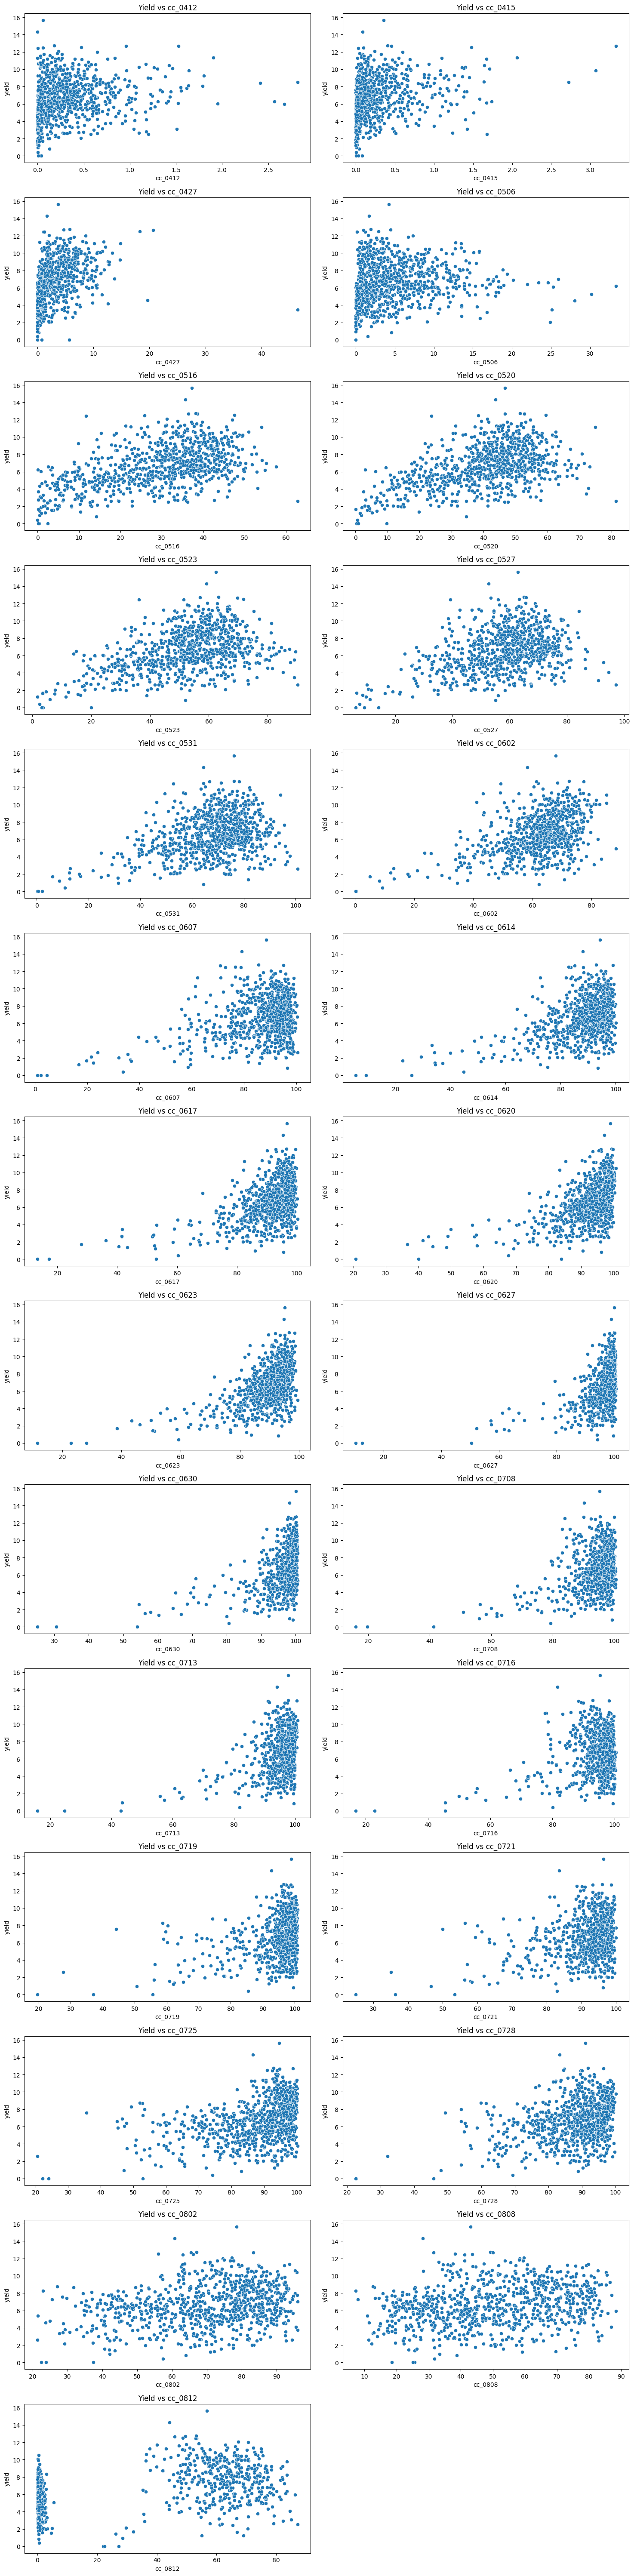

,yield
yield,1.000000
cc_0412,0.173745
cc_0415,0.271282
cc_0427,0.380750
cc_0506,0.092924
cc_0516,0.516862
cc_0520,0.491079
cc_0523,0.430729
cc_0527,0.364548
cc_0531,0.362891


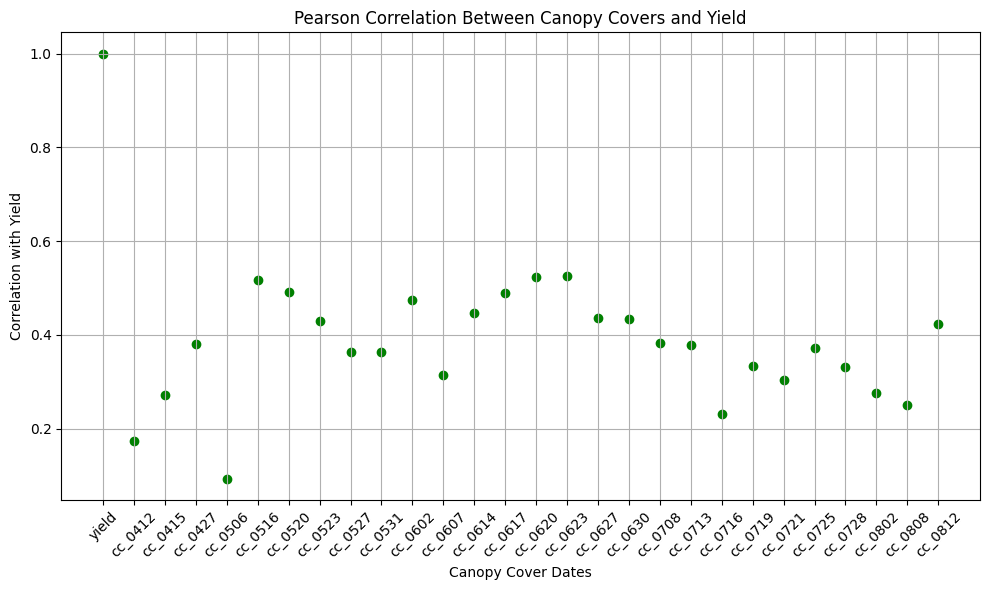

In [ ]:
import seaborn  as sns
from matplotlib import pyplot as plt


# scatter plot
fig,axes = plt.subplots(14,2, figsize=(15,60))
axes = axes.flatten()


cc_columns =[ col for col in df.columns if col.startswith('cc_')]

for i, col in enumerate(cc_columns):
    sns.scatterplot(x=col, y='yield', data=df, ax=axes[i])
    axes[i].set_title(f'Yield vs {col}')

plt.subplots_adjust(hspace=0.6, wspace=0.3)

axes[27].remove()

plt.tight_layout()
plt.show()

plt.close(fig)

#computing Correlation
corr = df[['yield'] + cc_columns ].corr(numeric_only=True)['yield']

plt.figure(figsize=(10, 6))
plt.scatter(corr.index, corr.values, color='green')
plt.title('Pearson Correlation Between Canopy Covers and Yield')
plt.xlabel('Canopy Cover Dates')
plt.ylabel('Correlation with Yield')
plt.xticks(rotation=45)
plt.grid(True)

# Save the figure as an image
plt.tight_layout()
plt.savefig('canopy_yield_correlation.png', dpi=300)

corr

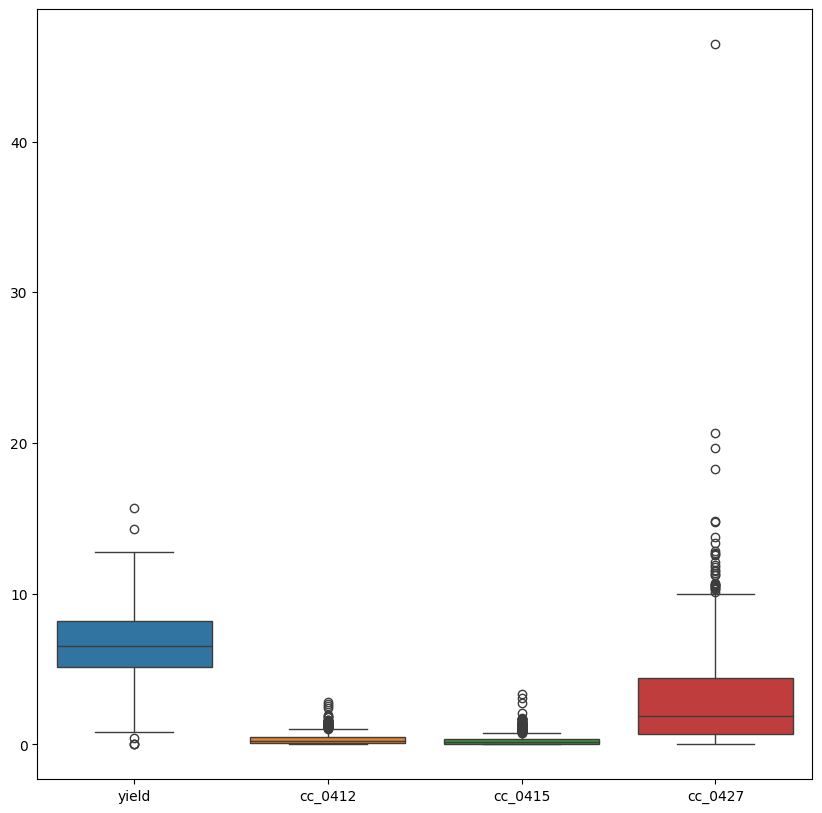

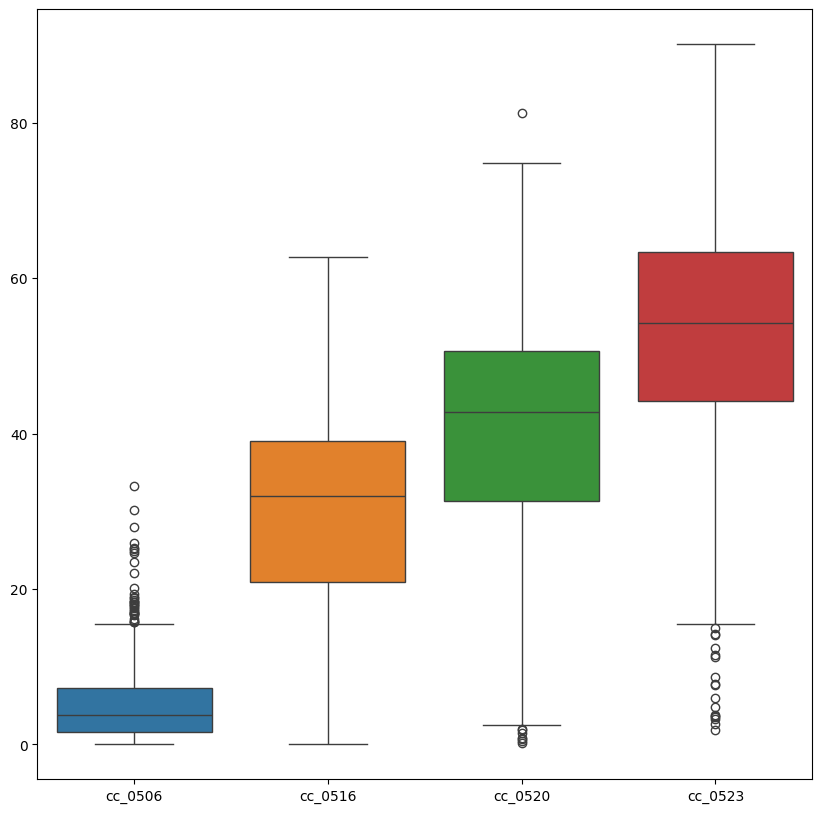

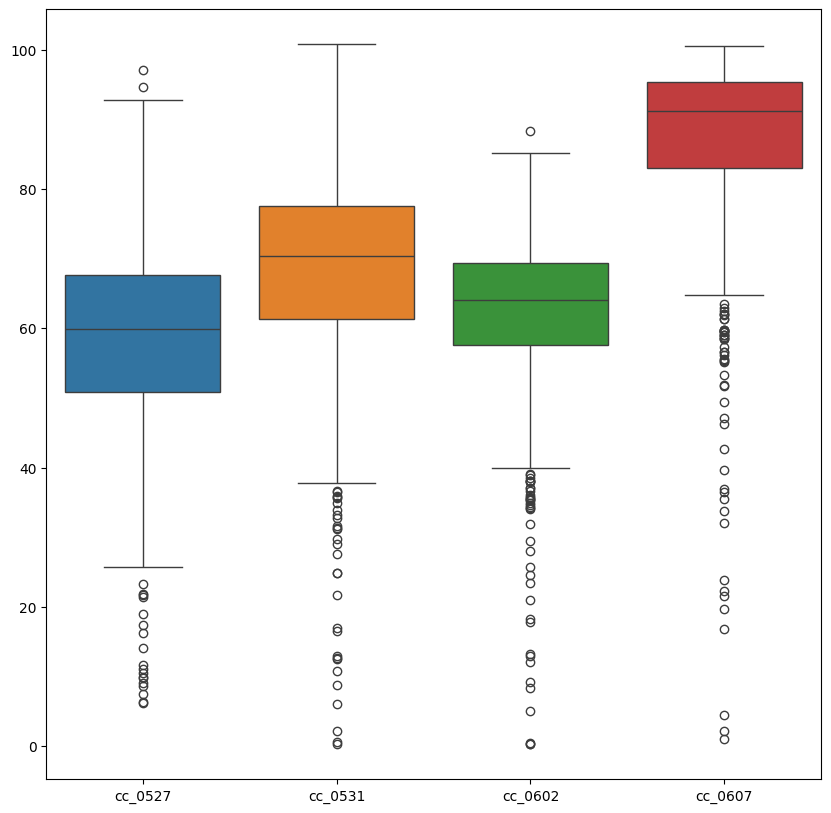

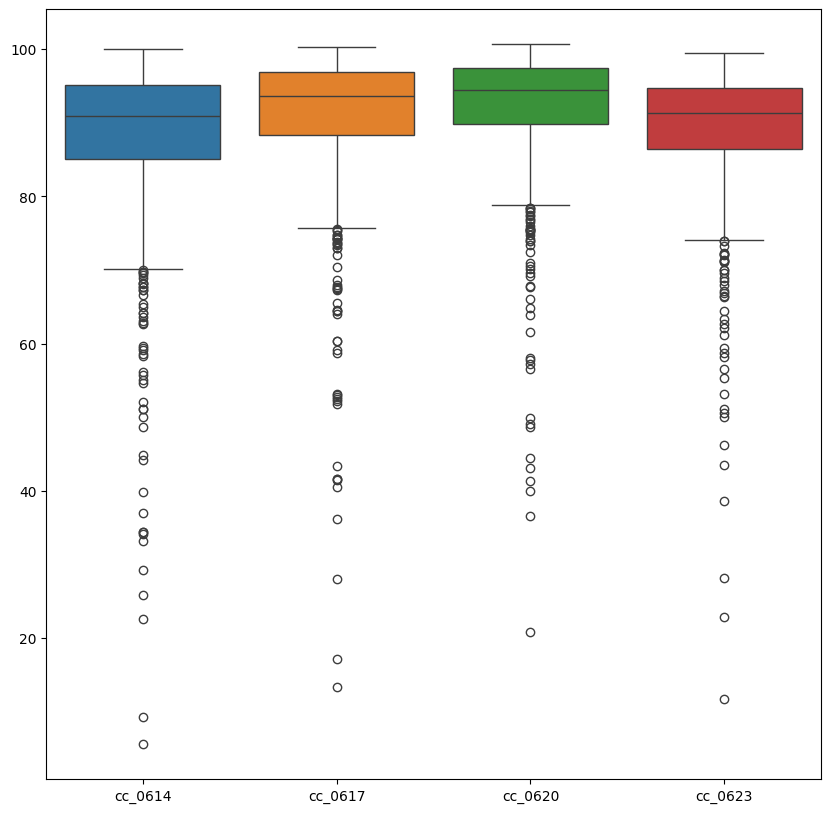

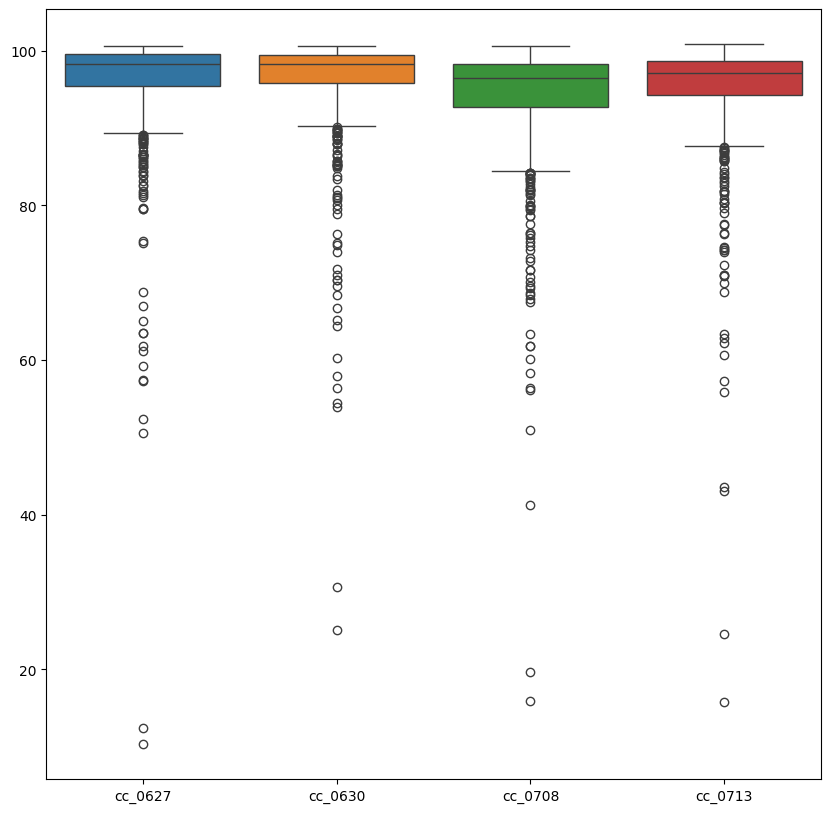

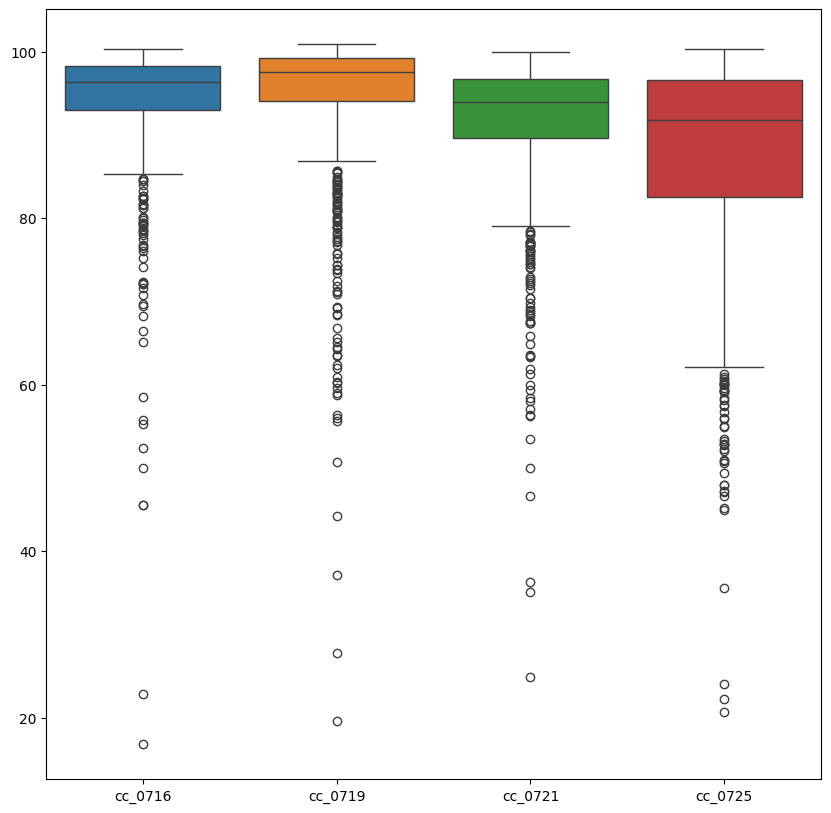

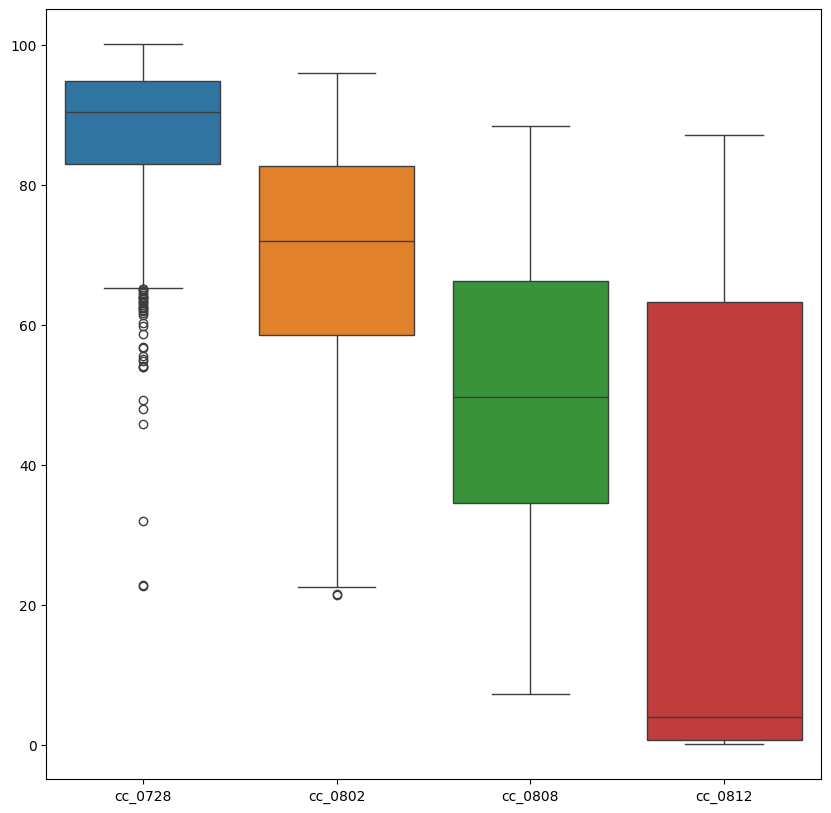

In [ ]:
# Displays the box plots in groups of group_size and print the remainder if group_size doesnt evenly divide the total
# number of columns to be displayed

# names of all canopy cover and yield column
yield_and_cc = ['yield'] + cc_columns

group_size = 4

num_whole_groups = len(yield_and_cc)// group_size

for i in range(num_whole_groups):
  fig = plt.figure(figsize=(10,10))
  sns.boxplot(data = df[yield_and_cc[0:group_size]])
  del yield_and_cc[0:group_size]
  plt.show()
  plt.close(fig)

if yield_and_cc:
  fig = plt.figure(figsize=(10,10))
  sns.boxplot(data = df[yield_and_cc])
  plt.show()
  plt.close(fig)






In [ ]:
# filling missing values using imputation

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.linear_model import LinearRegression


imputer = IterativeImputer(estimator=LinearRegression(),missing_values=np.nan,max_iter=50,
                           tol=0.01, n_nearest_features=4, min_value=0, max_value=100,
                           skip_complete=True, random_state=17)

# since our yield has no missing values, we only impute the the canopy covers
imputed_cc = pd.DataFrame(imputer.fit_transform(df[cc_columns]), columns=cc_columns)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Modeling

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
import joblib
import os


# create a directories to store the 2 major models if ithey don't exist
os.makedirs('saved_models/KNN', exist_ok=True)
os.makedirs('saved_models/RandomForest', exist_ok=True)

X = imputed_cc
y = df['yield']

# 70 % in training set, 15% each in validation and test set
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=17)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=17)

#stores the best model in every experiment
best_models = {'KNN': [], 'RandomForest': []}


## Tuning : no feature selction (FS)


In [ ]:
#Tuning of KNN models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

KNN_results= []

k_values = [15,16,17,18,19,20,29,99,201,109]

for k in k_values:
  #define models
  uniform_KNN = KNeighborsRegressor(n_neighbors=k, weights='uniform')
  distance_KNN = KNeighborsRegressor(n_neighbors=k,weights='distance')

  #train models
  uniform_KNN.fit(X_train, y_train)
  distance_KNN.fit(X_train,y_train)

  #print (f'uniform params\n {uniform_KNN.get_params(deep=True)} \n\n')
  #print (f'distance params\n {distance_KNN.get_params(deep=True)} \n\n')

  # make predictions
  uniform_y_val_pred = uniform_KNN.predict(X_val)
  distance_y_val_pred = distance_KNN.predict(X_val)

  # compute metrics for uniform_KNN model
  uniform_MSE = mean_squared_error(y_val, uniform_y_val_pred)
  uniform_r2 = r2_score(y_val,uniform_y_val_pred)

  # compute metrics for distance_KNN model
  distance_MSE = mean_squared_error(y_val, distance_y_val_pred)
  distance_r2 = r2_score(y_val,distance_y_val_pred)

  # save model with unique name
  uniform_filename = f'saved_models/KNN/Non_FS_{k}fold_uniform.pkl'
  joblib.dump(uniform_KNN, uniform_filename)

  # save model with unique name
  distance_filename = f'saved_models/KNN/Non_FS_{k}fold_distance.pkl'
  joblib.dump(distance_KNN, distance_filename)

  # store BOTH results
  KNN_results.append({
      'Type': 'Non_FS',
      'MSE': uniform_MSE,
      'R2': uniform_r2,
      'n_neighbors': k,
      'weights': 'uniform',
      'file':uniform_filename
  })

  KNN_results.append({
      'Type': 'Non_FS',
      'MSE': distance_MSE,
      'R2': distance_r2,
      'n_neighbors': k,
      'weights': 'distance',
      'file':distance_filename
  })

KNN_result_df = pd.DataFrame(KNN_results)

# sort by MSE
KNN_result_df.sort_values(by = 'MSE', ascending= True, inplace=True)
KNN_result_df.reset_index(drop=True, inplace=True)

# I inspected the result dataframe and found that the first value was the best
best_KNN = KNN_result_df.iloc[0].to_dict()
best_models['KNN'].append(best_KNN)#add the best model to the list

print(f'Best KNN Model {best_KNN}')

KNN_result_df.head()

Best KNN Model {'Type': 'Non_FS', 'MSE': 2.232144844127275, 'R2': 0.5885487974934525, 'n_neighbors': 15, 'weights': 'distance', 'file': 'saved_models/KNN/Non_FS_15fold_distance.pkl'}


,Type,MSE,R2,n_neighbors,weights,file
0,Non_FS,2.232145,0.588549,15,distance,saved_models/KNN/Non_FS_15fold_distance.pkl
1,Non_FS,2.232348,0.588511,20,distance,saved_models/KNN/Non_FS_20fold_distance.pkl
2,Non_FS,2.236180,0.587805,19,distance,saved_models/KNN/Non_FS_19fold_distance.pkl
3,Non_FS,2.251325,0.585013,15,uniform,saved_models/KNN/Non_FS_15fold_uniform.pkl
4,Non_FS,2.257920,0.583798,20,uniform,saved_models/KNN/Non_FS_20fold_uniform.pkl


In [ ]:
#Tuning of Random Forest
from sklearn.ensemble import RandomForestRegressor

n_estimators_values = [ 80,100,300,400,500] # number of trees
max_feature_values = ['sqrt','log2', 1.0,3,15,18,24]

RandomForest_results = []

# loop to combine every possible n_estimator, max_feature combination
for n_estimator in n_estimators_values:
  for max_feature in max_feature_values:
    RandomForest_model = RandomForestRegressor(n_estimators= n_estimator, max_features= max_feature, random_state=17)

    RandomForest_model.fit(X_train, y_train)

    RandomForest_y_val_pred = RandomForest_model.predict(X_val)

    #error computation
    RandomForest_MSE = mean_squared_error(y_val, RandomForest_y_val_pred)
    RandomForest_r2 = r2_score(y_val,RandomForest_y_val_pred)

    filename = f'saved_models/RandomForest/Non_FS_n{n_estimator}_m{max_feature}.plk'
    joblib.dump(RandomForest_model,filename)

    RandomForest_results.append({
        'Type': 'Non_FS',
        'MSE': RandomForest_MSE,
        'R2': RandomForest_r2,
        'n_estimators': n_estimator,
        'max_features':max_feature,
        'file':filename
    })

RandomForest_result_df = pd.DataFrame(RandomForest_results)

RandomForest_result_df.sort_values(by='MSE', ascending=True, inplace=True)
RandomForest_result_df.reset_index(drop=True, inplace=True)

best_RandomForest = RandomForest_result_df.iloc[0].to_dict()
best_models['RandomForest'].append(best_RandomForest)

print(f'Best RandomForest {best_RandomForest}')

RandomForest_result_df.head()

Best RandomForest {'Type': 'Non_FS', 'MSE': 2.190824396996518, 'R2': 0.5961653944651, 'n_estimators': 500, 'max_features': 18, 'file': 'saved_models/RandomForest/Non_FS_n500_m18.plk'}


,Type,MSE,R2,n_estimators,max_features,file
0,Non_FS,2.190824,0.596165,500,18,saved_models/RandomForest/Non_FS_n500_m18.plk
1,Non_FS,2.196197,0.595175,300,24,saved_models/RandomForest/Non_FS_n300_m24.plk
2,Non_FS,2.197039,0.595020,100,15,saved_models/RandomForest/Non_FS_n100_m15.plk
3,Non_FS,2.198121,0.594820,400,18,saved_models/RandomForest/Non_FS_n400_m18.plk
4,Non_FS,2.200188,0.594439,80,15,saved_models/RandomForest/Non_FS_n80_m15.plk


## Tuning: with Feature Selection (FS)


In [ ]:
# recompute correlation of imputed features to yield,
# imputed_corr = df[['yield'] + cc_columns].corr(numeric_only=True)['yield']


''' NOTE: i found that correlation of imputed featues is the same as correlation before
 imputation so I'm going to use the orginally computed correlation (corr)'''



#drop features that have weak to no correlation  to yield (0 <= corr < 0.4 )
cols_to_drop = [col for col in cc_columns if corr[col] < 0.4 ]

#FS1 for first feature selection set
FS1_X =  imputed_cc.drop(columns= cols_to_drop)
FS1_y = df['yield']

#Resplit Data
FS1_X_train, FS1_X_temp, FS1_y_train, FS1_y_temp = train_test_split(FS1_X, FS1_y, test_size=0.3, random_state= 17)
FS1_X_val, FS1_X_test, FS1_y_val, FS1_y_test = train_test_split(FS1_X_temp, FS1_y_temp, test_size=0.5, random_state=17)



####Training/Tuning FS1 models

In [ ]:
FS1_KNN_results= []

FS1_k_values = [3,5,9,15,16,17,18,19,20,29,39,49,69,99,201,109]

for k in FS1_k_values:
  #define models
  FS1_uniform_KNN = KNeighborsRegressor(n_neighbors=k, weights='uniform')
  FS1_distance_KNN = KNeighborsRegressor(n_neighbors=k,weights='distance')

  #train models
  FS1_uniform_KNN.fit(FS1_X_train, FS1_y_train)
  FS1_distance_KNN.fit(FS1_X_train,FS1_y_train)

  #print (f'uniform params\n {FS1_uniform_KNN.get_params(deep=True)} \n\n')
  #print (f'distance params\n {FS1_distance_KNN.get_params(deep=True)} \n\n')

  # make predictions
  FS1_uniform_y_val_pred = FS1_uniform_KNN.predict(FS1_X_val)
  FS1_distance_y_val_pred = FS1_distance_KNN.predict(FS1_X_val)

  # compute metrics for uniform_KNN model
  FS1_uniform_MSE = mean_squared_error(FS1_y_val, FS1_uniform_y_val_pred)
  FS1_uniform_r2 = r2_score(FS1_y_val,FS1_uniform_y_val_pred)

  # compute metrics for distance_KNN model
  FS1_distance_MSE = mean_squared_error(FS1_y_val, FS1_distance_y_val_pred)
  FS1_distance_r2 = r2_score(FS1_y_val,FS1_distance_y_val_pred)

 # save model with unique name
  FS1_uniform_filename = f'saved_models/KNN/FS_{k}fold_uniform.pkl'
  joblib.dump(FS1_uniform_KNN, FS1_uniform_filename) # Changed to FS1_uniform_KNN

  # save model with unique name
  FS1_distance_filename = f'saved_models/KNN/FS_{k}fold_distance.pkl'
  joblib.dump(FS1_distance_KNN, FS1_distance_filename) # Changed to FS1_distance_KNN



  # store BOTH results
  FS1_KNN_results.append({
      'Type': 'FS1',
      'MSE': FS1_uniform_MSE,
      'R2': FS1_uniform_r2,
      'n_neighbors': k,
      'weights': 'uniform',
      'file':FS1_uniform_filename
  })
  FS1_KNN_results.append({
      'Type': 'FS1',
      'MSE': FS1_distance_MSE,
      'R2': FS1_distance_r2,
      'n_neighbors': k,
      'weights': 'distance',
      'file':FS1_distance_filename
  })

FS1_KNN_result_df = pd.DataFrame(FS1_KNN_results)

# sort by MSE
FS1_KNN_result_df.sort_values(by = 'MSE', ascending= True, inplace=True)
FS1_KNN_result_df.reset_index(drop=True, inplace=True)

# I inspected the result dataframe and found that the first value was the best
FS1_best_KNN = FS1_KNN_result_df.iloc[0].to_dict()
best_models['KNN'].append(FS1_best_KNN)

print(f'Best  FS KNN Model {FS1_best_KNN}')

FS1_KNN_result_df.head()

Best  FS KNN Model {'Type': 'FS1', 'MSE': 2.180548035419847, 'R2': 0.5980596359338997, 'n_neighbors': 5, 'weights': 'uniform', 'file': 'saved_models/KNN/FS_5fold_uniform.pkl'}


,Type,MSE,R2,n_neighbors,weights,file
0,FS1,2.180548,0.598060,5,uniform,saved_models/KNN/FS_5fold_uniform.pkl
1,FS1,2.202957,0.593929,5,distance,saved_models/KNN/FS_5fold_distance.pkl
2,FS1,2.276532,0.580367,9,distance,saved_models/KNN/FS_9fold_distance.pkl
3,FS1,2.294960,0.576970,9,uniform,saved_models/KNN/FS_9fold_uniform.pkl
4,FS1,2.311883,0.573851,19,distance,saved_models/KNN/FS_19fold_distance.pkl


In [ ]:
FS1_n_estimators_values = [ 40,60,80,100,500] # number of trees
FS1_max_feature_values = ['sqrt','log2', 1.0,2,3,4,5,6,7,8,9,10]

FS1_RandomForest_results = []

# loop to combine every possible n_estimator, max_feature combination
for n_estimator in FS1_n_estimators_values:
  for max_feature in FS1_max_feature_values:
    FS1_RandomForest_model = RandomForestRegressor(n_estimators= n_estimator, max_features= max_feature, random_state=17)

    FS1_RandomForest_model.fit(FS1_X_train, FS1_y_train)

    FS1_RandomForest_y_val_pred = FS1_RandomForest_model.predict(FS1_X_val)

    #error computation
    FS1_RandomForest_MSE = mean_squared_error(FS1_y_val, FS1_RandomForest_y_val_pred)
    FS1_RandomForest_r2 = r2_score(FS1_y_val,FS1_RandomForest_y_val_pred)

    filename = f'saved_models/RandomForest/FS1_n{n_estimator}_m{max_feature}.plk'
    joblib.dump(FS1_RandomForest_model,filename)

    FS1_RandomForest_results.append({
        'Type': 'FS1',
        'MSE': FS1_RandomForest_MSE,
        'R2': FS1_RandomForest_r2,
        'n_estimators': n_estimator,
        'max_features':max_feature,
        'file': filename
    })

FS1_RandomForest_result_df = pd.DataFrame(FS1_RandomForest_results)

FS1_RandomForest_result_df.sort_values(by='MSE', ascending=True, inplace=True)
FS1_RandomForest_result_df.reset_index(drop=True, inplace=True)

FS1_best_RandomForest = FS1_RandomForest_result_df.iloc[0].to_dict()
best_models['RandomForest'].append(FS1_best_RandomForest)

print(f'Best RandomForest {FS1_best_RandomForest}')

FS1_RandomForest_result_df.head()

Best RandomForest {'Type': 'FS1', 'MSE': 2.1906220166412207, 'R2': 0.5962026992308591, 'n_estimators': 40, 'max_features': 6, 'file': 'saved_models/RandomForest/FS1_n40_m6.plk'}


,Type,MSE,R2,n_estimators,max_features,file
0,FS1,2.190622,0.596203,40,6,saved_models/RandomForest/FS1_n40_m6.plk
1,FS1,2.210652,0.592511,100,1.0,saved_models/RandomForest/FS1_n100_m1.0.plk
2,FS1,2.210764,0.592490,80,6,saved_models/RandomForest/FS1_n80_m6.plk
3,FS1,2.212519,0.592166,500,1.0,saved_models/RandomForest/FS1_n500_m1.0.plk
4,FS1,2.214964,0.591716,60,10,saved_models/RandomForest/FS1_n60_m10.plk


In [ ]:
# Choosing the best model
print (best_models)

#save the training and tuning statistics to file
dfi.export((pd.DataFrame(best_models['KNN'])).drop(columns=['file']),
           'Best_Train_Tune_KNN.png',table_conversion='chromium')
dfi.export((pd.DataFrame(best_models['RandomForest'])).drop(columns=['file']),
           'Best_Train_Tune_RandomForest.png',table_conversion='chromium')

#best_models_df

{'KNN': [{'Type': 'Non_FS', 'MSE': 2.232144844127275, 'R2': 0.5885487974934525, 'n_neighbors': 15, 'weights': 'distance', 'file': 'saved_models/KNN/Non_FS_15fold_distance.pkl'}, {'Type': 'FS1', 'MSE': 2.180548035419847, 'R2': 0.5980596359338997, 'n_neighbors': 5, 'weights': 'uniform', 'file': 'saved_models/KNN/FS_5fold_uniform.pkl'}], 'RandomForest': [{'Type': 'Non_FS', 'MSE': 2.190824396996518, 'R2': 0.5961653944651, 'n_estimators': 500, 'max_features': 18, 'file': 'saved_models/RandomForest/Non_FS_n500_m18.plk'}, {'Type': 'FS1', 'MSE': 2.1906220166412207, 'R2': 0.5962026992308591, 'n_estimators': 40, 'max_features': 6, 'file': 'saved_models/RandomForest/FS1_n40_m6.plk'}]}


#Evaluation

In [ ]:
# Linear Models have no hyper parameter so we just train it and test it

# Combining the train and validation set together because we are not tuning the linearregression model
X_train_val = pd.concat([X_train,X_val])
X_train_val.reset_index(drop=True,inplace=True)

y_train_val = pd.concat([y_train,y_val])
y_train_val.reset_index(drop=True,inplace=True)

FS1_X_train_val = pd.concat([FS1_X_train, FS1_X_val])
FS1_X_train_val.reset_index(drop=True,inplace=True)

FS1_y_train_val = pd.concat([FS1_y_train, FS1_y_val])
FS1_y_train.reset_index(drop=True,inplace=True)


Linear_stats = []

'''Training and Testing without feature selection'''
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)

# make predictions based on the test set
Linear_y_pred = Linear_model.predict(X_test)

#compute evaluation metrics
Linear_MSE = mean_squared_error(y_test, Linear_y_pred)
Linear_r2 = r2_score(y_test,Linear_y_pred)

Linear_stats.append({
    'Type': 'Non_FS',
    'MSE':Linear_MSE,
    'R2':Linear_r2
})


'''Training and Testing with feature selection'''
FS1_Linear_model = LinearRegression()
FS1_Linear_model.fit(FS1_X_train,FS1_y_train)

# make predictions based on the test set
FS1_Linear_y_pred = FS1_Linear_model.predict(FS1_X_test)

#compute evaluation metrics
FS1_Linear_MSE = mean_squared_error(FS1_y_test, FS1_Linear_y_pred)
FS1_Linear_r2 = r2_score(FS1_y_test,FS1_Linear_y_pred)

Linear_stats.append({
    'Type': 'FS1',
    'MSE':FS1_Linear_MSE,
    'R2':FS1_Linear_r2
})

#load the stats in a dataframe and save as a picture for use in report
Linear_stats_df = pd.DataFrame(Linear_stats)
dfi.export(Linear_stats_df, 'Linear_Model_Stats.png', table_conversion='chromium')


In [ ]:
KNN_stats =[]


for saved_KNN in  best_models['KNN']:
  if saved_KNN['Type'] == 'Non_FS':
    '''No Feature Selection'''
    #load the  best, previously trained model
    loaded_KNN = joblib.load(saved_KNN['file'])

    # make predictions based on the test set
    loaded_KNN_y_pred = loaded_KNN.predict(X_test)

    #compute evaluation metrics
    loaded_KNN_MSE = mean_squared_error(y_test,loaded_KNN_y_pred)
    loaded_KNN_r2 = r2_score(y_test,loaded_KNN_y_pred)

    KNN_stats.append({
        'Type':saved_KNN['Type'],
        'MSE':loaded_KNN_MSE,
        'R2':loaded_KNN_r2,
        'n_neighbors':(loaded_KNN.get_params())['n_neighbors'],
        'weights':(loaded_KNN.get_params())['weights']
    })
  else:
    '''Feature Selection'''
    #load the  best previously trained model
    FS1_loaded_KNN = joblib.load(saved_KNN['file'])

    # make predictions based on the test set
    FS1_loaded_KNN_y_pred = FS1_loaded_KNN.predict(FS1_X_test) # Changed X_test to FS1_X_test

    #compute evaluation metrics
    FS1_loaded_KNN_MSE = mean_squared_error(FS1_y_test,FS1_loaded_KNN_y_pred)
    FS1_loaded_KNN_r2 = r2_score(FS1_y_test,FS1_loaded_KNN_y_pred)

    KNN_stats.append({
        'Type':saved_KNN['Type'],
        'MSE':FS1_loaded_KNN_MSE,
        'R2':FS1_loaded_KNN_r2,
        'n_neighbors':(FS1_loaded_KNN.get_params())['n_neighbors'],
        'weights':(FS1_loaded_KNN.get_params())['weights']
    })

#load the stats in a dataframe and save as a picture for use in report
KNN_stats_df = pd.DataFrame(KNN_stats)
dfi.export(KNN_stats_df,'KNN_stats.png',table_conversion='chromium')

In [ ]:
RandomForest_stats =[]


for saved_RandomForest in  best_models['RandomForest']:
  if saved_RandomForest['Type'] == 'Non_FS':
    '''No Feature Selection'''
    #load the  best, previously trained model
    loaded_RandomForest = joblib.load(saved_RandomForest['file'])

    # make predictions based on the test set
    loaded_RandomForest_y_pred = loaded_RandomForest.predict(X_test)

    #compute evaluation metrics
    loaded_RandomForest_MSE = mean_squared_error(y_test,loaded_RandomForest_y_pred)
    loaded_RandomForest_r2 = r2_score(y_test,loaded_RandomForest_y_pred)

    RandomForest_stats.append({
        'Type':saved_RandomForest['Type'],
        'MSE':loaded_RandomForest_MSE,
        'R2':loaded_RandomForest_r2,
        'n_estimators':(loaded_RandomForest.get_params())['n_estimators'],
        'max_features':(loaded_RandomForest.get_params())['max_features']
    })
  else:
    '''Feature Selection'''
    #load the  best previously trained model
    FS1_loaded_RandomForest = joblib.load(saved_RandomForest['file'])

    # make predictions based on the test set
    FS1_loaded_RandomForest_y_pred = FS1_loaded_RandomForest.predict(FS1_X_test) # Changed X_test to FS1_X_test

    #compute evaluation metrics
    FS1_loaded_RandomForest_MSE = mean_squared_error(FS1_y_test,FS1_loaded_RandomForest_y_pred)
    FS1_loaded_RandomForest_r2 = r2_score(FS1_y_test,FS1_loaded_RandomForest_y_pred)

    RandomForest_stats.append({
        'Type':saved_RandomForest['Type'],
        'MSE':FS1_loaded_RandomForest_MSE,
        'R2':FS1_loaded_RandomForest_r2,
        'n_estimators':(FS1_loaded_RandomForest.get_params())['n_estimators'],
        'max_features':(FS1_loaded_RandomForest.get_params())['max_features']
    })

#load the stats in a dataframe and save as a picture for use in report
RandomForest_stats_df = pd.DataFrame(RandomForest_stats)
dfi.export(RandomForest_stats_df,'RandomForest_stats.png',table_conversion='chromium')